In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
import sqlite3

In [10]:
datastat = pd.read_csv ('C:/Users/nicol/OneDrive/Data Science/Resources/Module_10_AdvancedSQL/Starter_Code/Resources/hawaii_stations.csv')
datastat.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [11]:
datameas = pd.read_csv ('C:/Users/nicol/OneDrive/Data Science/Resources/Module_10_AdvancedSQL/Starter_Code/Resources/hawaii_measurements.csv')
datameas.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/nicol/OneDrive/Data Science/Resources/Module_10_AdvancedSQL/Starter_Code/Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model, Use the SQLAlchemy automap_base() function to reflect your tables into classes
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [18]:
# and then save references to the classes named station and measurement
measurement = Base.classes.measurement
station = Base.classes.station

In [19]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [20]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

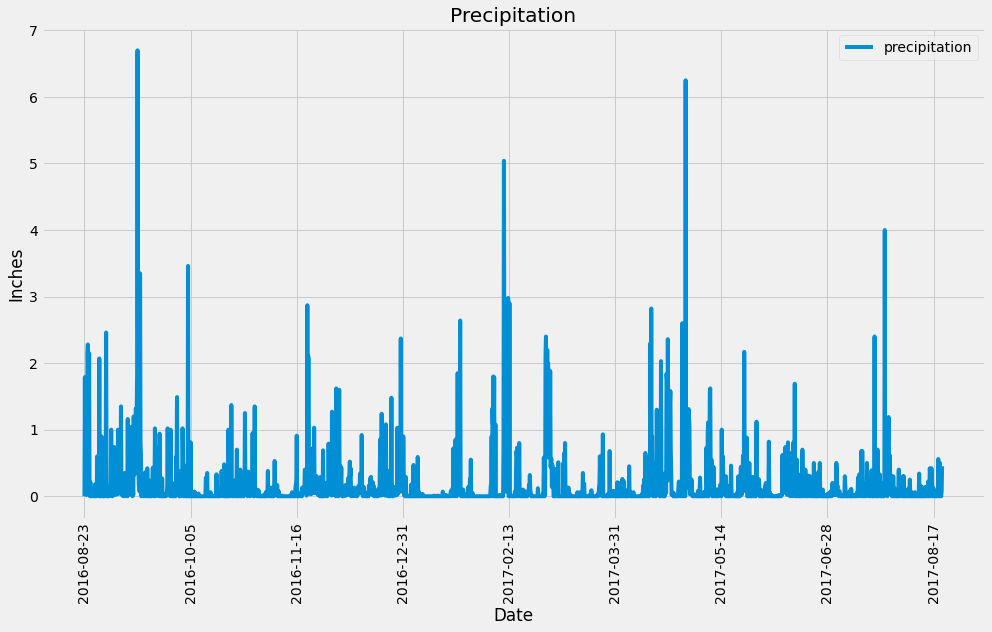

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns = ['Date', 'precipitation']).set_index('Date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize = (14,9), rot = 90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation')
# plt.legend('Precipitation') 
plt.tight_layout()
plt.show()

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()
# precipitation_df.info()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
numberofstations = session.query(station).count()
print(numberofstations)

9


In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactivestation = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station== 'USC00519281').all()
mostactivestation

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

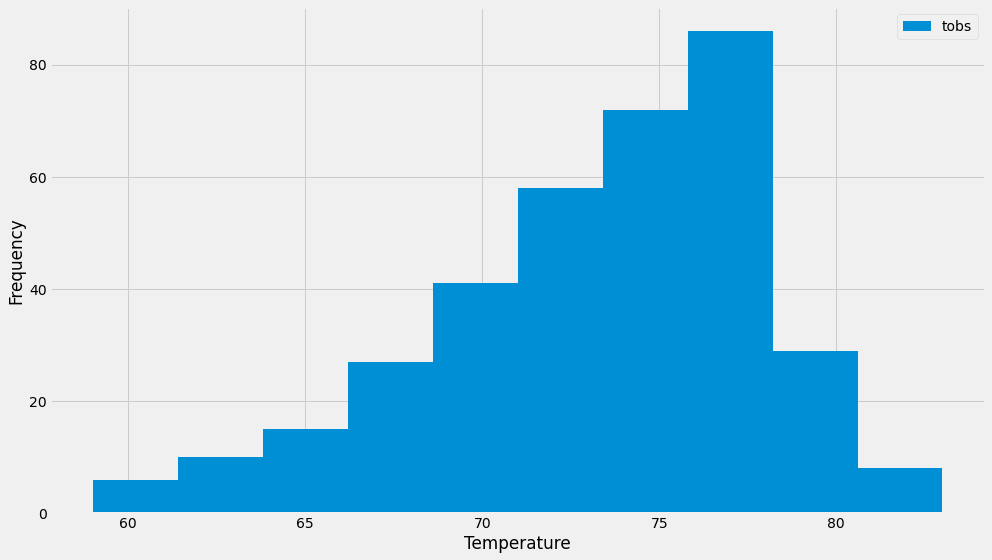

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= year_ago_date).all()

station_df = pd.DataFrame(active_station)
station_df.plot(kind = 'hist', figsize = (14,8), bins = 10)
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Close Session

In [85]:
# Close Session
session.close()